In [1]:
from collections import namedtuple
import re
from math import floor

BaseRobot = namedtuple("BaseRobot", ["x", "y", "vx", "vy"])


class Robot(BaseRobot):
    @property
    def quadrant(self):
        w = floor(WIDTH / 2)
        h = floor(HEIGHT / 2)

        if self.x < w:
            w = 0
        elif self.x > w:
            w = 1
        else:
            return 0

        if self.y < h:
            h = 0
        elif self.y > h:
            h = 2
        else:
            return 0

        return 1 + w + h

    def __repr__(self):
        return f"Robot at {self.x, self.y} @ quadrant {self.quadrant}. v={self.vx, self.vy}"


def read_file(path):
    f = open(path, "r").readlines()
    f = [x.strip().replace("p=", "").replace("v=", "") for x in f]
    f = [list(map(int, re.split(" |,", x))) for x in f]
    res = [Robot(*x) for x in f]
    return res


input = read_file("input")
WIDTH = 101
HEIGHT = 103

In [2]:
from collections import Counter
from math import prod


def move_robot(r: Robot, s: int) -> Robot:
    x = (r.x + s * r.vx) % WIDTH
    y = (r.y + s * r.vy) % HEIGHT
    return Robot(x, y, r.vx, r.vy)


robots = Counter([move_robot(x, 100).quadrant for x in input])
prod([c for q, c in robots.most_common() if q > 0])

226179492

In [6]:
import pandas as pd


def count_overlaps(robots, t):
    robots = robots[:]
    robots = [move_robot(x, t) for x in robots]
    df = (
        pd.DataFrame(robots)
        .groupby(["x", "y"], as_index=False)
        .agg(n=("x", "count"))
        .groupby("n", as_index=False)
        .agg(c=("n", "sum"))
    )

    overlap = int(df.query("n>1").c.sum())

    return overlap


res = dict()
for i in range(10000):
    res[i] = count_overlaps(input, i)

In [10]:
pd.DataFrame(list(res.items()), columns=["t", "o"]).sort_values(by="o")

,t,o
7502,7502,0
3639,3639,2
4773,4773,4
4883,4883,4
4259,4259,6
...,...,...
9118,9118,80
8512,8512,82
5179,5179,82
4371,4371,85


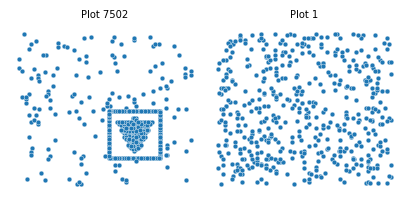

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import ceil


def draw_robots(robots, s_start, s_end, w=10):
    n_plots = s_end - s_start
    plot_rows = ceil(n_plots / w)
    fig, axes = plt.subplots(plot_rows, w, figsize=(w * 2, plot_rows * 2))
    axes = axes.flatten()
    plt.rcParams.update({"font.size": 6})

    for i in range(n_plots):
        robots = [move_robot(x, s_start + i) for x in robots]
        df = pd.DataFrame(robots)
        sns.scatterplot(data=df, x="x", y="y", ax=axes[i], s=12)
        axes[i].set_title(f"Plot {s_start + i}")
        axes[i].axis("off")

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.tight_layout()
    plt.show()


def draw_robots_list(robots, t_list, w=10):
    n_plots = len(t_list)
    plot_rows = ceil(n_plots / w)
    fig, axes = plt.subplots(plot_rows, w, figsize=(w * 2, plot_rows * 2))
    axes = axes.flatten()
    plt.rcParams.update({"font.size": 6})

    for i, t in enumerate(t_list):
        robots = [move_robot(x, t) for x in robots]
        df = pd.DataFrame(robots)
        sns.scatterplot(data=df, x="x", y="y", ax=axes[i], s=12)
        axes[i].set_title(f"Plot {t}")
        axes[i].axis("off")

    for i in range(n_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.tight_layout()
    plt.show()


draw_robots_list(input, [7502, 1])